In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units
import sys
sys.path.append("..")
# from system_control.tarpy import Tarpy
from tarpy.tarpy import Tarpy
from datetime import datetime,timedelta
import foo

In [2]:
# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (12, 12)

fontdict={
    'fontsize': plt.rcParams['axes.titlesize'],
    'fontweight' : plt.rcParams['axes.titleweight'],
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
    }

In [3]:
#? open a tarpfile with the python open module
with open(f"../data/2021102206Z.txt", "r") as file_in:
    #? pass the file into the tarp module
    trp = Tarpy(file_in)
dt = trp.props['basetime']
bt = datetime.strftime(dt,"%Y%m%d%HZ")
description = trp.props['description']

In [4]:

# ? PascalCase methods are variables to structred external class objects
# ? snake_case are variables interal functions
trp.help()


printing avaliable methods:
DataFrame
NDArray
geo_json
help
mgram
milibars
names_range
props
skewt


In [5]:

#?  a MultiIndex DataFrame is indexed by level, props and named by forecast_hour
trp.DataFrame

0        1        2        3        4        5    \
lvl  props                                                                
sfc  mean_slp      1019.73  1019.50  1019.19  1018.83  1019.03  1019.02   
     altimeter       30.10    30.09    30.09    30.07    30.08    30.08   
     press_alt      285.78   291.39   299.50   309.49   304.92   305.71   
     density_alt    -55.22   -88.18  -135.38  -186.09  -235.12  -262.16   
     2_m_agl_tmp    283.50   283.17   282.70   282.18   281.82   281.59   
...                    ...      ...      ...      ...      ...      ...   
50mb mixing_ratio     0.00     0.00     0.00     0.00     0.00     0.00   
     cwmr             0.00     0.00     0.00     0.00     0.00     0.00   
     icing_type      -1.00    -1.00    -1.00    -1.00    -1.00    -1.00   
     turbulence       0.00     0.00     0.00     0.00     0.00     0.00   
     vvs              0.00     0.00    -0.00    -0.00    -0.00     0.00   

                       6        7        8        9    ...      135      136  \
lvl  props                                             ...                     
sfc  mean_slp      1019.09  1019.54  1019.60  1019.49  ...   993.90   994.18   
     altimeter       30.08    30.09    30.10    30.09  ...    29.34    29.34   
     press_alt      304.16   292.24   289.64   292.43  ...   996.27   988.33   
     density_alt   -312.89  -296.80  -142.70    -0.45  ...  1564.38  1478.83   
     2_m_agl_tmp    281.20   281.43   282.70   283.86  ...   289.01   288.43   
...                    ...      ...      ...      ...  ...      ...      ...   
50mb mixing_ratio     0.00     0.00     0.00     0.00  ...     0.00     0.00   
     cwmr             0.00     0.00     0.00     0.00  ...     0.00     0.00   
     icing_type      -1.00    -1.00    -1.00    -1.00  ...    -1.00    -1.00   
     turbulence       0.00     0.00     0.00     0.00  ...     0.00     0.00   
     vvs             -0.00    -0.00     0.00     0.00  ...    -0.00    -0.00   

                       137      138      139      140      141      142  \
lvl  props                                                                
sfc  mean_slp       994.47   994.76   995.10   995.44   995.79   995.99   
     altimeter       29.35    29.36    29.37    29.38    29.39    29.40   
     press_alt      980.39   972.45   963.21   953.97   944.74   939.51   
     density_alt   1393.31  1307.80  1265.79  1224.16  1182.28  1137.12   
     2_m_agl_tmp    287.85   287.27   287.05   286.84   286.62   286.34   
...                    ...      ...      ...      ...      ...      ...   
50mb mixing_ratio     0.00     0.00     0.00     0.00     0.00     0.00   
     cwmr             0.00     0.00     0.00     0.00     0.00     0.00   
     icing_type      -1.00    -1.00    -1.00    -1.00    -1.00    -1.00   
     turbulence       0.00     0.00     0.00     0.00     0.00     0.00   
     vvs             -0.00    -0.00    -0.00    -0.00    -0.00    -0.00   

                       143      144  
lvl  props                           
sfc  mean_slp       996.20   996.41  
     altimeter       29.40    29.41  
     press_alt      934.28   929.05  
     density_alt   1091.92  1046.88  
     2_m_agl_tmp    286.06   285.78  
...                    ...      ...  
50mb mixing_ratio     0.00     0.00  
     cwmr             0.00     0.00  
     icing_type      -1.00    -1.00  
     turbulence       0.00     0.00  
     vvs             -0.00     0.00  

[804 rows x 145 columns]

In [6]:

# ? an ndarray provides a light weight and fast method to perform VIV against previous models
a = trp.NDArray
print(a)


[[ 1.01973e+03  1.01950e+03  1.01919e+03 ...  9.95990e+02  9.96200e+02
   9.96410e+02]
 [ 3.01000e+01  3.00900e+01  3.00900e+01 ...  2.94000e+01  2.94000e+01
   2.94100e+01]
 [ 2.85780e+02  2.91390e+02  2.99500e+02 ...  9.39510e+02  9.34280e+02
   9.29050e+02]
 ...
 [-1.00000e+00 -1.00000e+00 -1.00000e+00 ... -1.00000e+00 -1.00000e+00
  -1.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -0.00000e+00 ... -0.00000e+00 -0.00000e+00
   0.00000e+00]]


In [7]:

#?  the foreast valid time is accessed through the indexing forecast_hours
print(trp.props['forecast_hours'])

['0hr', '1hr', '2hr', '3hr', '4hr', '5hr', '6hr', '7hr', '8hr', '9hr', '10hr', '11hr', '12hr', '13hr', '14hr', '15hr', '16hr', '17hr', '18hr', '19hr', '20hr', '21hr', '22hr', '23hr', '24hr', '25hr', '26hr', '27hr', '28hr', '29hr', '30hr', '31hr', '32hr', '33hr', '34hr', '35hr', '36hr', '37hr', '38hr', '39hr', '40hr', '41hr', '42hr', '43hr', '44hr', '45hr', '46hr', '47hr', '48hr', '49hr', '50hr', '51hr', '52hr', '53hr', '54hr', '55hr', '56hr', '57hr', '58hr', '59hr', '60hr', '61hr', '62hr', '63hr', '64hr', '65hr', '66hr', '67hr', '68hr', '69hr', '70hr', '71hr', '72hr', '73hr', '74hr', '75hr', '76hr', '77hr', '78hr', '79hr', '80hr', '81hr', '82hr', '83hr', '84hr', '85hr', '86hr', '87hr', '88hr', '89hr', '90hr', '91hr', '92hr', '93hr', '94hr', '95hr', '96hr', '97hr', '98hr', '99hr', '100hr', '101hr', '102hr', '103hr', '104hr', '105hr', '106hr', '107hr', '108hr', '109hr', '110hr', '111hr', '112hr', '113hr', '114hr', '115hr', '116hr', '117hr', '118hr', '119hr', '120hr', '121hr', '122hr', '1

Text(0.5, 1.0, 'KBLV - SCOTT AFB MIDAMERICA - GALWEM 22 Oct 2021 06Z Extracted Model Run 1 Hourly Data\nElev: 459ft / 140m Lat: 38.55 Long: -89.84 Runway: 320/140\nBASETIME: 2021-10-22 06:00:00 || VALIDTIME: 2021-10-23 02:00:00')

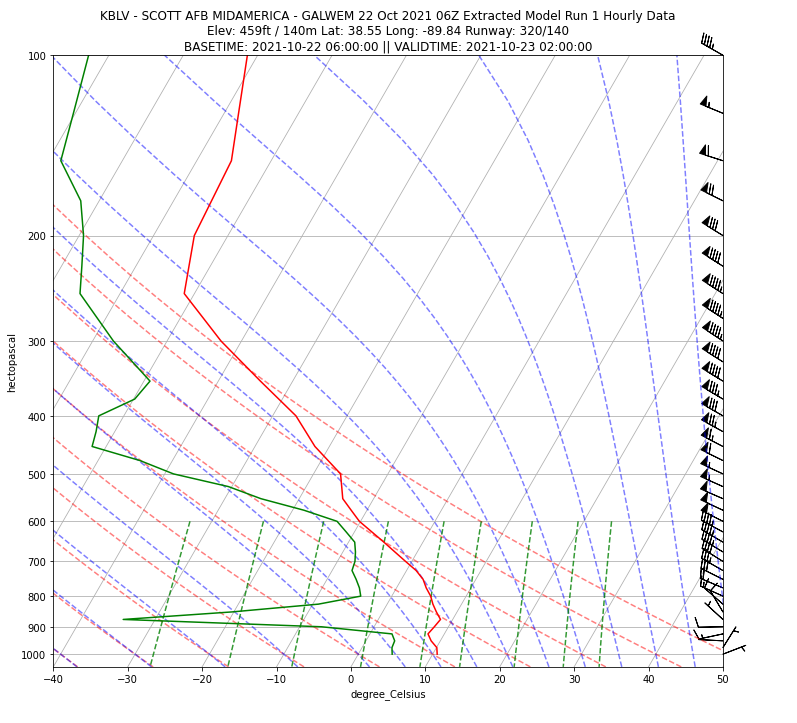

In [8]:
ivt = 20 # index_valid_time
plot = trp.skewt()
skew = plot.show(ivt)

vt = dt + timedelta(hours=ivt)
title = f"{description}BASETIME: {dt} || VALIDTIME: {vt}"
plt.title(title, fontdict=fontdict)


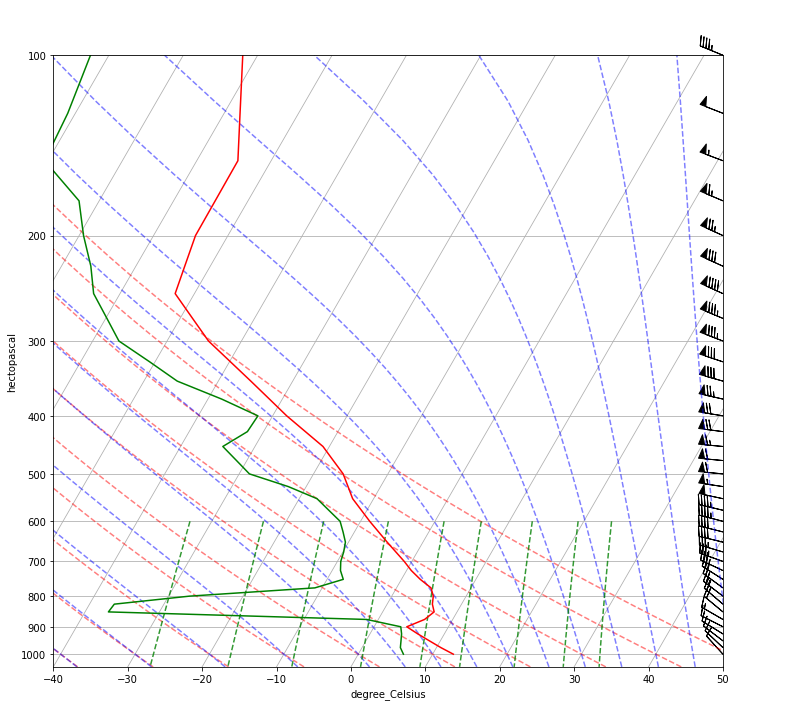

In [9]:
plot.show(15)

In [10]:
with open(f"../data/2021102206Z.txt", "r") as file_in:
    tp = Tarpy(file_in)

d = tp.asDict()
d.pop('sfc')
df = pd.DataFrame(d).T


AttributeError: 'Tarpy' object has no attribute 'asDict'

In [ ]:
gph = []
temp = []
dewpt = []
direction= []
speed=[]
P = np.char.replace(np.array(df.index,dtype=str),'mb','').astype(int)*units.mbar

# temp	temp_dval	dewpt	rh	parcel_temp	theta-e	dir	speed	
for i, lvl in enumerate(d):
    gph.append(d[lvl]['gph'])
    temp.append(d[lvl]['temp'])
    dewpt.append(d[lvl]['dewpt'])
    direction.append(d[lvl]['dir'])
    speed.append(d[lvl]['speed'])

# p = np.array(gph)[:,0]*units.hPa

T = np.array(temp)[:,0]* units.degK
Td = np.array(dewpt)[:,0]* units.degK
wind_speed = np.array(speed)[:,0] * units.knots
wind_dir = np.array(direction)[:,0] * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)
# p,height,T,Td, u,v
# speed
# print(p1)
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(P, T, 'r')
skew.plot(P, Td, 'g')
skew.plot_barbs(P, u, v)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
